In [1]:
import pandas as pd
import numpy as np
from apyori import apriori

In [3]:
raw_data=pd.read_excel(r"D:\数模\第四次模拟题——在线零售商的订单履行\附件一.xlsx")
raw_data.head()

,订单,订单中的SKU,订单对应的顾客位置坐标
0,O00001,"[77,63,94,1,36,10,70,86,14,67]","[71.0270441124638,33.8644796735834]"
1,O00002,"[36,25,24,33,92,76]","[55.4853668373032,76.1047715540322]"
2,O00003,"[74,23,26,89]","[47.9812275454335,35.6245047959696]"
3,O00004,"[67,20]","[46.5971290026430,42.0066352580043]"
4,O00005,"[82,34,61,69,63,87,28,75]","[54.4360971527062,76.6912521649171]"


In [4]:
SKU1=raw_data['订单中的SKU']
SKU_in_order=[]
# 原有数据类型为'[]'型，先进行转化,最终要得到['','']的形式
for order in SKU1:
    if type(order)==int:
        SKU_in_order.append(str(order))
    else:
        order=order[1:-1].split(",")
        SKU_in_order.append(order)

print(len(SKU_in_order))


50000


In [ ]:
result=list(apriori(SKU_in_order,min_support=0.0001,max_length=2))
result_pd=pd.DataFrame(result)
result_pd.to_csv("2长度关联度.csv")

In [ ]:
# 转化为100维向量,订单j的货物i为SKU_vec[i-1][j]=1
SKU_vec=[[]]
for i in SKU_in_order:
    tmp=list(np.zeros(101))
    #print(i)
    for j in i:
        #print(j)
        tmp[int(j)]=1
    SKU_vec.append(tmp)

print(SKU_vec[1][1:])

[1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


[   0. 2710. 2660. 2764. 2716. 2791. 2690. 2705. 2728. 2623. 2713. 2732.
 2650. 2745. 2727. 2764. 2762. 2756. 2704. 2705. 2707. 2703. 2714. 2762.
 2705. 2774. 2681. 2737. 2760. 2713. 2790. 2839. 2701. 2698. 2688. 2743.
 2789. 2749. 2786. 2784. 2804. 2788. 2718. 2865. 2726. 2772. 2712. 2680.
 2798. 2687. 2771. 2821. 2845. 2737. 2821. 2800. 2776. 2709. 2739. 2841.
 2750. 2798. 2868. 2728. 2704. 2759. 2913. 2812. 2731. 2689. 2788. 2794.
 2730. 2711. 2742. 2733. 2825. 2784. 2779. 2800. 2722. 2762. 2788. 2776.
 2719. 2730. 2728. 2766. 2711. 2781. 2734. 2870. 2758. 2763. 2804. 2653.
 2702. 2694. 2808. 2917. 2767.]
275269.0


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

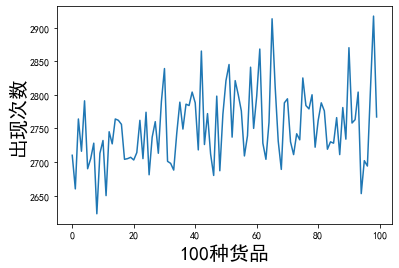

In [5]:
cnt=np.zeros(101)
for i in SKU_in_order:
    if type(i)==list:
        for j in i:
            cnt[int(j)]+=1
    else :
        cnt[int(i)]+=1
 
print(cnt)
print(cnt.sum())
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号 #有中文出现的情况，需要u'内容'
plt.plot(cnt[1:])
plt.xlabel("100种货品",fontsize=20)
plt.ylabel("出现次数",fontsize=20)
plt.xticks(size=20)
plt.xticks(size=10)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

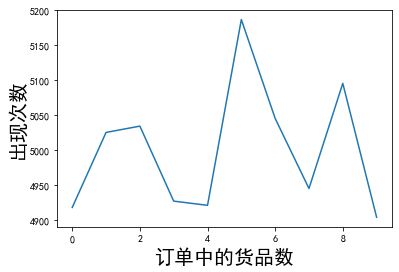

In [6]:
# 长度统计
len_cnt=np.zeros(11)
for i in SKU_in_order:
    if type(i)==list:
        len_cnt[len(i)]+=1
    else :
        len_cnt[1]+=1

plt.plot(len_cnt[1:])
plt.xlabel("订单中的货品数",fontsize=20)
plt.ylabel("出现次数",fontsize=20)
plt.xticks(size=20)
plt.xticks(size=10)

In [7]:
# 需要的订单数。将100个货品分成3块。仓库1放 1，2块 仓库2放 2，3 块 仓库3放 1，3块
# 此处为按序号分
cnt_2=0
cnt_1=0
for i in SKU_in_order:
    ii=[int(j) for j in i]
    ii.sort(reverse=False)
    if ii[0]<33 and ii[-1]>66:
        cnt_2+=1
    else:
        cnt_1+=1
print(cnt_1)
print(cnt_2)

16991
33009


In [8]:
key_val=[]
for i in range(1,101):
    key_val.append([i,cnt[i]])

key_val=pd.DataFrame(key_val)
d=key_val.sort_values(1,ascending=False)
SKU_sort=d.iloc[:,0].values

A=set(SKU_sort[0:39])
B=set(SKU_sort[40:69])
C=set(SKU_sort[70:99])
D=set(SKU_sort[0:9])

print(A)

# 仓库1 放A+B   仓库2 放B+C  仓库3 放 B+C+D

{3, 5, 25, 30, 31, 36, 38, 39, 40, 41, 43, 45, 48, 50, 51, 52, 54, 55, 56, 59, 61, 62, 66, 67, 70, 71, 76, 77, 78, 79, 82, 83, 87, 89, 91, 94, 98, 99, 100}


In [9]:
print(SKU_sort)

[ 99  66  91  62  43  52  59  31  76  54  51  67  98  94  40  55  79  48
  61  71   5  30  36  41  82  70  38  77  39  89  78  56  83  25  45  50
 100  87   3  15  93  16  81  23  28  65  92  17  60  37  13  35  74  58
  27  53  90  75  11  68  72  85  63  86   8  14  44  80  84  42   4  22
  29  10  46  73  88   1  57  20  19  24   7  64  18  21  96  32  33  97
   6  69  34  49  26  47   2  95  12   9]


In [ ]:
cnt_2_s=0
cnt_1_s=0
for i in SKU_in_order:
    ii=set([int(j) for j in i])
    if ii.issubset(A|B):
        cnt_1_s+=1
    elif ii.issubset(A|C):
        cnt_1_s+=1
    elif ii.issubset(B|C|D):
        cnt_1_s+=1
    else:
        cnt_2_s+=1

print(cnt_1_s)
print(cnt_2_s)
print(cnt_1_s+cnt_2_s*2)

19469
30531
80531


In [ ]:
cnt_2_ss=0
cnt_1_ss=0

S1=set(SKU_sort[0:9])
S2=set(SKU_sort[10:19])
S3=set(SKU_sort[20:29])
S4=set(SKU_sort[30:39])
S5=set(SKU_sort[40:49])
S6=set(SKU_sort[50:59])
S7=set(SKU_sort[60:69])
S8=set(SKU_sort[70:79])
S9=set(SKU_sort[80:89])
S10=set(SKU_sort[90:99])
for i in SKU_in_order:
    ii=set([int(j) for j in i])
    if ii.issubset(S1|S2|S5|S10):
        cnt_1_ss+=1
    elif ii.issubset(S1|S3|S6|S9):
        cnt_1_ss+=1
    elif ii.issubset(S1|S4|S7|S8):
        cnt_1_ss+=1
    else:
        cnt_2_ss+=1

print(cnt_1_ss)
print(cnt_2_ss)

4298
45702


In [ ]:
from random import shuffle

minval=100000
t_best=[]
t=SKU_sort
for c in range(1000):
    cnt_2_ss=0
    cnt_1_ss=0
    shuffle(t)
    AA=set(t[0:69])
    shuffle(t)
    BB=set(t[0:69])
    shuffle(t)
    CC=set(t[0:69])
    for i in SKU_in_order:
        ii=set([int(j) for j in i])
        if ii.issubset(AA):
            cnt_1_ss+=1
        elif ii.issubset(BB):
            cnt_1_ss+=1
        elif ii.issubset(CC):
            cnt_1_ss+=1
        else:
            cnt_2_ss+=1

    if minval>cnt_1_ss+2*cnt_2_ss:
        minval=cnt_1_ss+2*cnt_2_ss
        t_best=t

In [ ]:
print(minval)
print(t_best)
print(cnt_1_s+2*cnt_2_s)

79000
[ 70   3  53  98   1  28  46  67  77  48   5  27  82  89  50  26  73  19
  13  75  79  38  86  54  32  63  78  84  31  14   9  20  62  65  44  90
  94  30  92  59  88   4  36  71  22  83  39  57  11  85  52  99  76  12
  49  66  95  23  64  47  45  21  37  56  80 100   7  61  35  93  29   8
  51  60  96  24  15  55   2  18  17  33  97  40  74  34  16   6  69  68
  10  42  25  81  87  43  41  72  58  91]
79780


In [ ]:
# 构造共现矩阵
ros=np.zeros((50000,100))
for i in range(len(SKU_in_order)):

    if type(SKU_in_order[i])==str:
        ros[i][int(SKU_in_order[i])-1]=1
    else:
        for j in SKU_in_order[i]:
            ros[i][int(j)-1]=1


# for i in range(100):
#     print(ros[i,:].sum())
R=np.dot(ros.T,ros)
print(R.trace())
print(R.shape)

275269.0
(100, 100)


In [ ]:
# 贪婪热销算法   
# SKU_sort 为排好序的数组
# x个货品在三个仓库都有，y个货品在两个仓库里有，z个货品只有一个仓库有
# x+y+z=100
# 3*x+2*y+z=210
#  X=Z+10
#  y=110-2x
bestsum=9999999
bestW1=[]
bestW2=[]
bestW3=[]
bestx=0
c1=0
c2=0
for x in range(1,70):
    
    # 准备仓库
    W1=[]
    W2=[]
    W3=[]

    # x
    for i in range(x):
        W1.append(SKU_sort[i]-1)
        W2.append(SKU_sort[i]-1)
        W3.append(SKU_sort[i]-1)

    # print(W1)
    # print(len(W1))


    # y
    if x<110-x:
        for i in range(x,min(110-x,100)):

            item=SKU_sort[i]-1

            sum1=0
            if len(W1)<70:
                for j in W1:
                    sum1+=R[item][j]
            sum1=sum1/len(W1)
            #else :sum1=99999

            sum2=0
            if len(W2)<70:
                for j in W2:
                    sum2+=R[item][j]
            sum2=sum2/len(W2)
            #else :sum2=99999

            sum3=0
            if len(W3)<70:
                for j in W3:
                    sum3+=R[item][j]
            sum3=sum3/len(W3)
            #else :sum3=99999
            
            if sum1!=0 and sum2!=0 and sum3!=0:
                if min(sum1,sum2,sum3)==sum1:
                    W2.append(item)
                    W3.append(item)
                elif min(sum1,sum2,sum3)==sum2:
                    W1.append(item)
                    W3.append(item)
                elif min(sum1,sum2,sum3)==sum3:
                    W1.append(item)
                    W2.append(item)
            
            if sum1==0 or sum2==0 or sum3==0:
                if sum1!=0:
                    W1.append(item)
                if sum2!=0:
                    W2.append(item)
                if sum3!=0:
                    W3.append(item)
        # print(len(W1))
        # print(len(W2))

    # z   
    if 110-x<100:
        for i in range(110-x,100):

            item=SKU_sort[i]-1

            sum1=0
            if len(W1)<70:
                for j in W1:
                    sum1+=R[item][j]
            sum1=sum1/len(W1)

            sum2=0
            if len(W2)<70:
                for j in W2:
                    sum2+=R[item][j]
            sum2=sum2/len(W2)

            sum3=0
            if len(W3)<70:
                for j in W3:
                    sum3+=R[item][j]
            sum3=sum3/len(W3)
            
            if max(sum1,sum2,sum3)==sum1 and sum1!=0:
                    W1.append(item)
            elif max(sum1,sum2,sum3)==sum2 and sum2!=0:
                    W2.append(item)
            elif max(sum1,sum2,sum3)==sum3 and sum3!=0:
                    W3.append(item)

    # 序号从 0-99变为1—100
    for i in range(len(W1)):
        W1[i]=W1[i]+1
    for i in range(len(W2)):
        W2[i]=W2[i]+1
    for i in range(len(W3)):
        W3[i]=W3[i]+1
    W_S1=set(W1)
    W_S2=set(W2)
    W_S3=set(W3)
    sum=0
    cm_1=0
    cm_2=0
    for i in SKU_in_order:
        if type(i)==str:
            ii=[int(i)]
        else:
            ii=[int(t) for t in i]
        if set(ii).issubset(W_S1) or set(ii).issubset(W_S2) or set(ii).issubset(W_S3):
            sum+=1
            cm_1+=1
        elif set(ii).issubset(W_S1 | W_S2) or set(ii).issubset(W_S2 | W_S3) or set(ii).issubset(W_S3|W_S1):
            sum+=2
            cm_2+=1
        else:
            sum+=3
    
    if sum<bestsum:
        bestsum=sum
        bestW1=W1
        bestW2=W2
        bestW3=W3
        c1=cm_1
        c2=cm_2
        bestx=x
    

In [ ]:
print(bestsum)
print(len(bestW1))
print(len(bestW2))
print(len(bestW3))
print(c1)
print(c2)

sb1=set(bestW1)
sb2=set(bestW2)
sb3=set(bestW3)

print(len(sb1|sb2|sb3))
print(bestx)
print(bestW1)
print(bestW2)
print(bestW3)

75697
70
70
70
24303
25697
100
12
[99, 66, 91, 62, 43, 52, 59, 31, 76, 54, 51, 67, 61, 71, 30, 36, 41, 82, 38, 39, 78, 56, 83, 45, 50, 87, 3, 15, 81, 23, 28, 65, 92, 60, 37, 35, 74, 58, 53, 90, 75, 11, 72, 85, 8, 14, 44, 80, 29, 10, 46, 1, 57, 20, 19, 24, 21, 96, 32, 33, 97, 6, 69, 34, 49, 26, 47, 2, 95, 12]
[99, 66, 91, 62, 43, 52, 59, 31, 76, 54, 51, 67, 98, 94, 40, 55, 79, 48, 5, 30, 36, 70, 77, 89, 83, 25, 100, 87, 3, 15, 93, 16, 23, 28, 17, 60, 13, 74, 27, 75, 11, 68, 85, 63, 86, 8, 14, 44, 84, 42, 4, 22, 73, 88, 20, 24, 7, 64, 18, 33, 97, 6, 69, 34, 49, 26, 47, 2, 95, 9]
[99, 66, 91, 62, 43, 52, 59, 31, 76, 54, 51, 67, 98, 94, 40, 55, 79, 48, 61, 71, 5, 41, 82, 70, 38, 77, 39, 89, 78, 56, 25, 45, 50, 100, 93, 16, 81, 65, 92, 17, 37, 13, 35, 58, 27, 53, 90, 68, 72, 63, 86, 80, 84, 42, 4, 22, 29, 10, 46, 73, 88, 1, 57, 19, 7, 64, 18, 21, 96, 32]


In [ ]:
for i in range(len(bestW1)):
        bestW1[i]=bestW1[i]+1

print(bestW1)

[99, 66, 91, 62, 43, 52, 59, 31, 76, 54, 51, 67, 61, 71, 30, 36, 41, 82, 38, 39, 78, 56, 83, 45, 50, 87, 3, 15, 81, 23, 28, 65, 92, 60, 37, 35, 74, 58, 53, 90, 75, 11, 72, 85, 8, 14, 44, 80, 29, 10, 46, 1, 57, 20, 19, 24, 21, 96, 32, 33, 97, 6, 69, 34, 49, 26, 47, 2, 95, 12]


In [ ]:
'''
79758
70
70
70
23009
24224
100
x=12
'''

In [ ]:
c1*1+c2*2

71792

In [ ]:
print(range(10,100))

range(10, 100)


In [ ]:
len(W_S1|W_S2|W_S3)

100

In [ ]:
def func(x):
    w1_list=x[0:99]
    w2_list=x[100:199]
    w3_list=x[200:299]
    W1=[]
    W2=[]
    W3=[]
    for i in range(100):
        if w1_list[i]==1:
            W1.append(str(i+1))

In [ ]:
constraint_eq = [
    lambda x: sum(x[0:99])-70,
    lambda x: sum(x[100:199])-70,
    lambda x: sum(x[200:299])-70
]

In [ ]:

from sko.GA import GA
pso = GA(func=func, n_dim=300, max_iter=300, lb=np.zeros(300), ub=np.ones(300), constraint_eq=constraint_eq,precision=np.ones(300))